In [1]:
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Activation

Using Theano backend.


In [2]:
import numpy as np

In [3]:
from collections import defaultdict, Counter
from scipy.sparse import csr_matrix

class MultiGraph:
    def __init__(self):
        self.n_nodes = 0
        self.n_rels = 0
        self.nodes = {}
        self.rels = {}
        self.node_labels = []
        self.rel_labels = []
        self.graph = {}
        self.counter = Counter()
    
    def add_connection(self, connection):
        # connection is (source, relation, target)
        src,rel,targ = connection
        #add new nodes and relations to dictionaries
        if src not in self.nodes.keys():
            self.nodes[src] = self.n_nodes
            self.node_labels.append(src)
            self.n_nodes += 1
        if targ not in self.nodes.keys():
            self.nodes[targ] = self.n_nodes
            self.node_labels.append(targ)
            self.n_nodes += 1
        if rel not in self.rels.keys():
            self.rels[rel] = self.n_rels
            self.rel_labels.append(rel)
            self.n_rels += 1
        #count number of relations
        self.counter.update({rel: 1})
        # add new connection to graph
        if self.nodes[src] not in self.graph.keys():
            self.graph[self.nodes[src]] = defaultdict(set)
        self.graph[self.nodes[src]][self.nodes[targ]].add(self.rels[rel])
    
    def get_adjacency_graph(self):
        #it is an out-going adjacency graph
        a_graph = np.zeros((self.n_nodes,self.n_nodes,self.n_rels))
        for k1,v1 in self.graph.iteritems():
            for k2,v2 in v1.iteritems():
                a_graph[k1][k2] = np.array([1 if i in v2 else 0 for i in range(self.n_rels)])
        return a_graph
    
    def get_node_label(self,index):
        return self.node_labels[index]
    
    def get_relation_label(self,index):
        return self.rel_labels[index]
    
    def get_relation_counter(self):
        return self.counter

In [4]:
import csv
""" EXAMPLE
add,IS,operator
subtract,IS,operator
multiply,IS,operator
divide,IS,operator
open_closure,IS,operator
close_closure,IS,operator
"""
op_graph = MultiGraph()
with open('operator_graph.csv', 'r') as csvfile:
    graphreader = csv.reader(csvfile)
    for row in graphreader:
        #print(row)
        op_graph.add_connection(row)

In [5]:
a_graph = op_graph.get_adjacency_graph()
print("number of nodes",op_graph.n_nodes)
print("number of relations",op_graph.n_rels)
#print("node labels",op_graph.node_labels)
print(op_graph.counter)

('number of nodes', 14)
('number of relations', 5)
Counter({'IsA': 9, 'TakesNArgs': 9, 'UsedFor': 9, 'InverseOf': 6, 'DerivedFrom': 1})


In [6]:
x_train = a_graph.reshape(op_graph.n_nodes, op_graph.n_nodes*op_graph.n_rels)
print('input dims:',op_graph.n_nodes*op_graph.n_rels)

('input dims:', 70)


In [7]:
encoding_dim = 2
input_dim = op_graph.n_nodes*op_graph.n_rels

ae = Sequential()
ae.add(Dense(4 * encoding_dim, input_shape=(input_dim,), activation='relu',name="first_encoding"))
ae.add(Dense(2 * encoding_dim, activation='relu',name="second_encoding"))
ae.add(Dense(encoding_dim, activation='relu',name="the_code"))

# Decoder Layers
ae.add(Dense(2 * encoding_dim, activation='relu',name="first_decoding"))
ae.add(Dense(4 * encoding_dim, activation='relu',name="second_decoding"))
ae.add(Dense(input_dim, activation='sigmoid',name="reconstruction"))

ae.summary()
ae.compile(optimizer='adam', loss='mse')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
first_encoding (Dense)       (None, 8)                 568       
_________________________________________________________________
second_encoding (Dense)      (None, 4)                 36        
_________________________________________________________________
the_code (Dense)             (None, 2)                 10        
_________________________________________________________________
first_decoding (Dense)       (None, 4)                 12        
_________________________________________________________________
second_decoding (Dense)      (None, 8)                 40        
_________________________________________________________________
reconstruction (Dense)       (None, 70)                630       
Total params: 1,296.0
Trainable params: 1,296
Non-trainable params: 0.0
_________________________________________________________________


In [8]:
ae.fit(x_train, x_train,epochs=1000)

Epoch 1/1000
14/14 [==============================] - 0s - loss: 0.2503
Epoch 2/1000
14/14 [==============================] - 0s - loss: 0.2500
Epoch 3/1000
14/14 [==============================] - 0s - loss: 0.2497
Epoch 4/1000
14/14 [==============================] - 0s - loss: 0.2494
Epoch 5/1000
14/14 [==============================] - 0s - loss: 0.2492
Epoch 6/1000
14/14 [==============================] - 0s - loss: 0.2489
Epoch 7/1000
14/14 [==============================] - 0s - loss: 0.2486
Epoch 8/1000
14/14 [==============================] - 0s - loss: 0.2483
Epoch 9/1000
14/14 [==============================] - 0s - loss: 0.2480
Epoch 10/1000
14/14 [==============================] - 0s - loss: 0.2477
Epoch 11/1000
14/14 [==============================] - 0s - loss: 0.2475
Epoch 12/1000
14/14 [==============================] - 0s - loss: 0.2472
Epoch 13/1000
14/14 [==============================] - 0s - loss: 0.2469
Epoch 14/1000
14/14 [==============================] - 0s - 

14/14 [==============================] - 0s - loss: 0.1935
Epoch 114/1000
14/14 [==============================] - 0s - loss: 0.1927
Epoch 115/1000
14/14 [==============================] - 0s - loss: 0.1919
Epoch 116/1000
14/14 [==============================] - 0s - loss: 0.1912
Epoch 117/1000
14/14 [==============================] - 0s - loss: 0.1904
Epoch 118/1000
14/14 [==============================] - 0s - loss: 0.1896
Epoch 119/1000
14/14 [==============================] - 0s - loss: 0.1888
Epoch 120/1000
14/14 [==============================] - 0s - loss: 0.1881
Epoch 121/1000
14/14 [==============================] - 0s - loss: 0.1873
Epoch 122/1000
14/14 [==============================] - 0s - loss: 0.1865
Epoch 123/1000
14/14 [==============================] - 0s - loss: 0.1857
Epoch 124/1000
14/14 [==============================] - 0s - loss: 0.1849
Epoch 125/1000
14/14 [==============================] - 0s - loss: 0.1841
Epoch 126/1000
14/14 [==============================]

14/14 [==============================] - 0s - loss: 0.1074
Epoch 224/1000
14/14 [==============================] - 0s - loss: 0.1068
Epoch 225/1000
14/14 [==============================] - 0s - loss: 0.1061
Epoch 226/1000
14/14 [==============================] - 0s - loss: 0.1054
Epoch 227/1000
14/14 [==============================] - 0s - loss: 0.1048
Epoch 228/1000
14/14 [==============================] - 0s - loss: 0.1041
Epoch 229/1000
14/14 [==============================] - 0s - loss: 0.1035
Epoch 230/1000
14/14 [==============================] - 0s - loss: 0.1029
Epoch 231/1000
14/14 [==============================] - 0s - loss: 0.1022
Epoch 232/1000
14/14 [==============================] - 0s - loss: 0.1016
Epoch 233/1000
14/14 [==============================] - 0s - loss: 0.1010
Epoch 234/1000
14/14 [==============================] - 0s - loss: 0.1003
Epoch 235/1000
14/14 [==============================] - 0s - loss: 0.0997
Epoch 236/1000
14/14 [==============================]

14/14 [==============================] - 0s - loss: 0.0569
Epoch 334/1000
14/14 [==============================] - 0s - loss: 0.0567
Epoch 335/1000
14/14 [==============================] - 0s - loss: 0.0564
Epoch 336/1000
14/14 [==============================] - 0s - loss: 0.0561
Epoch 337/1000
14/14 [==============================] - 0s - loss: 0.0559
Epoch 338/1000
14/14 [==============================] - 0s - loss: 0.0556
Epoch 339/1000
14/14 [==============================] - 0s - loss: 0.0553
Epoch 340/1000
14/14 [==============================] - 0s - loss: 0.0551
Epoch 341/1000
14/14 [==============================] - 0s - loss: 0.0548
Epoch 342/1000
14/14 [==============================] - 0s - loss: 0.0546
Epoch 343/1000
14/14 [==============================] - 0s - loss: 0.0543
Epoch 344/1000
14/14 [==============================] - 0s - loss: 0.0540
Epoch 345/1000
14/14 [==============================] - 0s - loss: 0.0538
Epoch 346/1000
14/14 [==============================]

14/14 [==============================] - 0s - loss: 0.0378
Epoch 444/1000
14/14 [==============================] - 0s - loss: 0.0377
Epoch 445/1000
14/14 [==============================] - 0s - loss: 0.0376
Epoch 446/1000
14/14 [==============================] - 0s - loss: 0.0375
Epoch 447/1000
14/14 [==============================] - 0s - loss: 0.0374
Epoch 448/1000
14/14 [==============================] - 0s - loss: 0.0373
Epoch 449/1000
14/14 [==============================] - 0s - loss: 0.0372
Epoch 450/1000
14/14 [==============================] - 0s - loss: 0.0371
Epoch 451/1000
14/14 [==============================] - 0s - loss: 0.0370
Epoch 452/1000
14/14 [==============================] - 0s - loss: 0.0369
Epoch 453/1000
14/14 [==============================] - 0s - loss: 0.0368
Epoch 454/1000
14/14 [==============================] - 0s - loss: 0.0367
Epoch 455/1000
14/14 [==============================] - 0s - loss: 0.0366
Epoch 456/1000
14/14 [==============================]

14/14 [==============================] - 0s - loss: 0.0303
Epoch 554/1000
14/14 [==============================] - 0s - loss: 0.0303
Epoch 555/1000
14/14 [==============================] - 0s - loss: 0.0302
Epoch 556/1000
14/14 [==============================] - 0s - loss: 0.0302
Epoch 557/1000
14/14 [==============================] - 0s - loss: 0.0301
Epoch 558/1000
14/14 [==============================] - 0s - loss: 0.0301
Epoch 559/1000
14/14 [==============================] - 0s - loss: 0.0300
Epoch 560/1000
14/14 [==============================] - 0s - loss: 0.0300
Epoch 561/1000
14/14 [==============================] - 0s - loss: 0.0300
Epoch 562/1000
14/14 [==============================] - 0s - loss: 0.0299
Epoch 563/1000
14/14 [==============================] - 0s - loss: 0.0299
Epoch 564/1000
14/14 [==============================] - 0s - loss: 0.0298
Epoch 565/1000
14/14 [==============================] - 0s - loss: 0.0298
Epoch 566/1000
14/14 [==============================]

14/14 [==============================] - 0s - loss: 0.0269
Epoch 664/1000
14/14 [==============================] - 0s - loss: 0.0269
Epoch 665/1000
14/14 [==============================] - 0s - loss: 0.0269
Epoch 666/1000
14/14 [==============================] - 0s - loss: 0.0268
Epoch 667/1000
14/14 [==============================] - 0s - loss: 0.0268
Epoch 668/1000
14/14 [==============================] - 0s - loss: 0.0268
Epoch 669/1000
14/14 [==============================] - 0s - loss: 0.0268
Epoch 670/1000
14/14 [==============================] - 0s - loss: 0.0267
Epoch 671/1000
14/14 [==============================] - 0s - loss: 0.0267
Epoch 672/1000
14/14 [==============================] - 0s - loss: 0.0267
Epoch 673/1000
14/14 [==============================] - 0s - loss: 0.0267
Epoch 674/1000
14/14 [==============================] - 0s - loss: 0.0267
Epoch 675/1000
14/14 [==============================] - 0s - loss: 0.0266
Epoch 676/1000
14/14 [==============================]

14/14 [==============================] - 0s - loss: 0.0251
Epoch 774/1000
14/14 [==============================] - 0s - loss: 0.0251
Epoch 775/1000
14/14 [==============================] - 0s - loss: 0.0251
Epoch 776/1000
14/14 [==============================] - 0s - loss: 0.0251
Epoch 777/1000
14/14 [==============================] - 0s - loss: 0.0251
Epoch 778/1000
14/14 [==============================] - 0s - loss: 0.0251
Epoch 779/1000
14/14 [==============================] - 0s - loss: 0.0250
Epoch 780/1000
14/14 [==============================] - 0s - loss: 0.0250
Epoch 781/1000
14/14 [==============================] - 0s - loss: 0.0250
Epoch 782/1000
14/14 [==============================] - 0s - loss: 0.0250
Epoch 783/1000
14/14 [==============================] - 0s - loss: 0.0250
Epoch 784/1000
14/14 [==============================] - 0s - loss: 0.0250
Epoch 785/1000
14/14 [==============================] - 0s - loss: 0.0250
Epoch 786/1000
14/14 [==============================]

14/14 [==============================] - 0s - loss: 0.0241
Epoch 884/1000
14/14 [==============================] - 0s - loss: 0.0241
Epoch 885/1000
14/14 [==============================] - 0s - loss: 0.0241
Epoch 886/1000
14/14 [==============================] - 0s - loss: 0.0241
Epoch 887/1000
14/14 [==============================] - 0s - loss: 0.0241
Epoch 888/1000
14/14 [==============================] - 0s - loss: 0.0241
Epoch 889/1000
14/14 [==============================] - 0s - loss: 0.0240
Epoch 890/1000
14/14 [==============================] - 0s - loss: 0.0240
Epoch 891/1000
14/14 [==============================] - 0s - loss: 0.0240
Epoch 892/1000
14/14 [==============================] - 0s - loss: 0.0240
Epoch 893/1000
14/14 [==============================] - 0s - loss: 0.0240
Epoch 894/1000
14/14 [==============================] - 0s - loss: 0.0240
Epoch 895/1000
14/14 [==============================] - 0s - loss: 0.0240
Epoch 896/1000
14/14 [==============================]

14/14 [==============================] - 0s - loss: 0.0234
Epoch 994/1000
14/14 [==============================] - 0s - loss: 0.0234
Epoch 995/1000
14/14 [==============================] - 0s - loss: 0.0234
Epoch 996/1000
14/14 [==============================] - 0s - loss: 0.0234
Epoch 997/1000
14/14 [==============================] - 0s - loss: 0.0234
Epoch 998/1000
14/14 [==============================] - 0s - loss: 0.0234
Epoch 999/1000
14/14 [==============================] - 0s - loss: 0.0234
Epoch 1000/1000
14/14 [==============================] - 0s - loss: 0.0234


In [9]:
coding_model = Model(inputs=ae.input, outputs=ae.get_layer("the_code").output)
embedding = coding_model.predict(x_train)

In [10]:
for i in range(len(embedding)):
    print str(op_graph.get_node_label(i))+' : '+str(list(embedding[i]))

add : [0.0, 0.1740515]
operator : [0.0024629722, 0.0]
subtract : [0.0, 0.04664001]
multiply : [0.0, 0.32913658]
divide : [0.0, 0.28757364]
if : [0.0024629722, 0.0]
and : [0.0, 0.2749715]
or : [0.0, 0.2749715]
not : [0.0, 0.012844935]
identity : [0.0024629722, 0.0]
2 : [0.0024629722, 0.0]
1 : [0.0024629722, 0.0]
arithmatic : [0.0024629722, 0.0]
logic : [0.0024629722, 0.0]


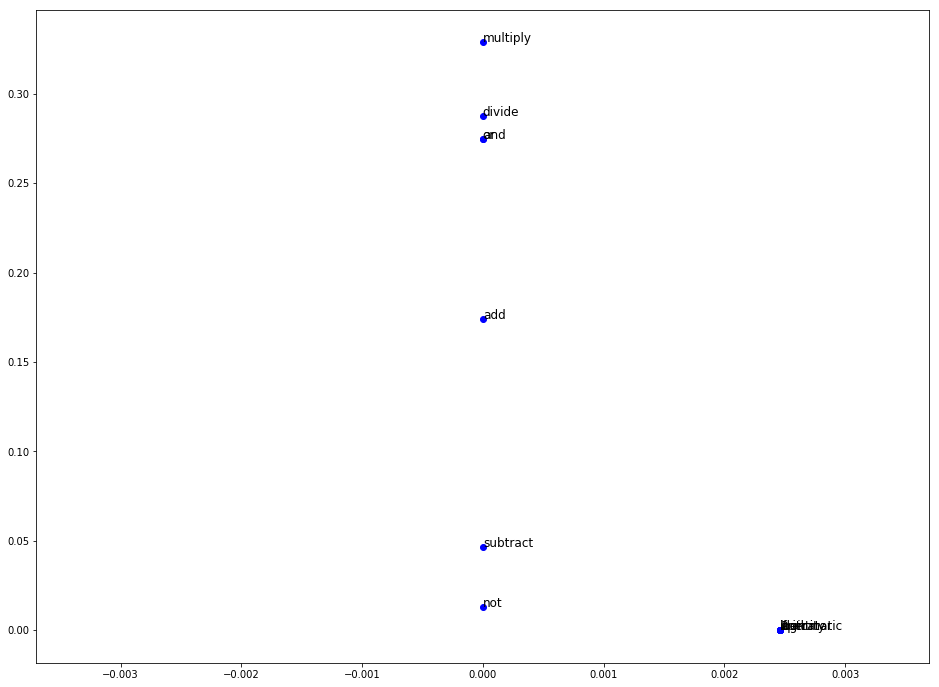

In [11]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16, 12))
#ax = fig.add_subplot(111, projection='2d')
ax = fig.add_subplot(111)
for i in range(len(embedding)):
    ax.scatter(embedding[i,0],embedding[i,1],color='b') 
    ax.text(embedding[i,0],embedding[i,1],  '%s' % (op_graph.get_node_label(i)), size=12, zorder=1, color='k') 